In [2]:
import os
import pandas as pd
import numpy as np

datasets = os.listdir('./Dataset')
datasets

['02-14-2018.csv',
 '02-15-2018.csv',
 '02-16-2018.csv',
 '02-20-2018.csv',
 '02-21-2018.csv',
 '02-22-2018.csv',
 '02-23-2018.csv',
 '02-28-2018.csv',
 '03-01-2018.csv',
 '03-02-2018.csv',
 'PreprocessComplete.csv']

In [ ]:
for i in datasets:
    print(i,end=" : ")
    data = pd.read_csv('./Dataset/'+i)
    print(len(data.columns))

del data

02-14-2018.csv : 80
02-15-2018.csv : 

In [ ]:
def fixDataType(df_dataset):
    
    df_dataset = df_dataset[df_dataset['Dst Port'] != 'Dst Port']
    
    df_dataset['Dst Port'] = df_dataset['Dst Port'].astype(int)
    df_dataset['Protocol'] = df_dataset['Protocol'].astype(int)
    df_dataset['Flow Duration'] = df_dataset['Flow Duration'].astype(int)
    df_dataset['Tot Fwd Pkts'] = df_dataset['Tot Fwd Pkts'].astype(int)
    df_dataset['Tot Bwd Pkts'] = df_dataset['Tot Bwd Pkts'].astype(int)
    df_dataset['TotLen Fwd Pkts'] = df_dataset['TotLen Fwd Pkts'].astype(int)
    df_dataset['TotLen Bwd Pkts'] = df_dataset['TotLen Bwd Pkts'].astype(int)
    df_dataset['Fwd Pkt Len Max'] = df_dataset['Fwd Pkt Len Max'].astype(int)
    df_dataset['Fwd Pkt Len Min'] = df_dataset['Fwd Pkt Len Min'].astype(int)
    df_dataset['Fwd Pkt Len Mean'] = df_dataset['Fwd Pkt Len Mean'].astype(float)
    df_dataset['Fwd Pkt Len Std'] = df_dataset['Fwd Pkt Len Std'].astype(float)
    df_dataset['Bwd Pkt Len Max'] = df_dataset['Bwd Pkt Len Max'].astype(int)
    df_dataset['Bwd Pkt Len Min'] = df_dataset['Bwd Pkt Len Min'].astype(int)
    df_dataset['Bwd Pkt Len Mean'] = df_dataset['Bwd Pkt Len Mean'].astype(float)
    df_dataset['Bwd Pkt Len Std'] = df_dataset['Bwd Pkt Len Std'].astype(float)
    df_dataset['Flow Byts/s'] = df_dataset['Flow Byts/s'].astype(float)
    df_dataset['Flow Pkts/s'] = df_dataset['Flow Pkts/s'].astype(float)
    df_dataset['Flow IAT Mean'] = df_dataset['Flow IAT Mean'].astype(float)
    df_dataset['Flow IAT Std'] = df_dataset['Flow IAT Std'].astype(float)
    df_dataset['Flow IAT Max'] = df_dataset['Flow IAT Max'].astype(int)
    df_dataset['Flow IAT Min'] = df_dataset['Flow IAT Min'].astype(int)
    df_dataset['Fwd IAT Tot'] = df_dataset['Fwd IAT Tot'].astype(int)
    df_dataset['Fwd IAT Mean'] = df_dataset['Fwd IAT Mean'].astype(float)
    df_dataset['Fwd IAT Std'] = df_dataset['Fwd IAT Std'].astype(float)
    df_dataset['Fwd IAT Max'] = df_dataset['Fwd IAT Max'].astype(int)
    df_dataset['Fwd IAT Min'] = df_dataset['Fwd IAT Min'].astype(int)
    df_dataset['Bwd IAT Tot'] = df_dataset['Bwd IAT Tot'].astype(int)
    df_dataset['Bwd IAT Mean'] = df_dataset['Bwd IAT Mean'].astype(float)
    df_dataset['Bwd IAT Std'] = df_dataset['Bwd IAT Std'].astype(float)
    df_dataset['Bwd IAT Max'] = df_dataset['Bwd IAT Max'].astype(int)
    df_dataset['Bwd IAT Min'] = df_dataset['Bwd IAT Min'].astype(int)
    df_dataset['Fwd PSH Flags'] = df_dataset['Fwd PSH Flags'].astype(int)
    df_dataset['Bwd PSH Flags'] = df_dataset['Bwd PSH Flags'].astype(int)
    df_dataset['Fwd URG Flags'] = df_dataset['Fwd URG Flags'].astype(int)
    df_dataset['Bwd URG Flags'] = df_dataset['Bwd URG Flags'].astype(int)
    df_dataset['Fwd Header Len'] = df_dataset['Fwd Header Len'].astype(int)
    df_dataset['Bwd Header Len'] = df_dataset['Bwd Header Len'].astype(int)
    df_dataset['Fwd Pkts/s'] = df_dataset['Fwd Pkts/s'].astype(float)
    df_dataset['Bwd Pkts/s'] = df_dataset['Bwd Pkts/s'].astype(float)
    df_dataset['Pkt Len Min'] = df_dataset['Pkt Len Min'].astype(int)
    df_dataset['Pkt Len Max'] = df_dataset['Pkt Len Max'].astype(int)
    df_dataset['Pkt Len Mean'] = df_dataset['Pkt Len Mean'].astype(float)
    df_dataset['Pkt Len Std'] = df_dataset['Pkt Len Std'].astype(float)
    df_dataset['Pkt Len Var'] = df_dataset['Pkt Len Var'].astype(float)
    df_dataset['FIN Flag Cnt'] = df_dataset['FIN Flag Cnt'].astype(int)
    df_dataset['SYN Flag Cnt'] = df_dataset['SYN Flag Cnt'].astype(int)
    df_dataset['RST Flag Cnt'] = df_dataset['RST Flag Cnt'].astype(int)
    df_dataset['PSH Flag Cnt'] = df_dataset['PSH Flag Cnt'].astype(int)
    df_dataset['ACK Flag Cnt'] = df_dataset['ACK Flag Cnt'].astype(int)
    df_dataset['URG Flag Cnt'] = df_dataset['URG Flag Cnt'].astype(int)
    df_dataset['CWE Flag Count'] = df_dataset['CWE Flag Count'].astype(int)
    df_dataset['ECE Flag Cnt'] = df_dataset['ECE Flag Cnt'].astype(int)
    df_dataset['Down/Up Ratio'] = df_dataset['Down/Up Ratio'].astype(int)
    df_dataset['Pkt Size Avg'] = df_dataset['Pkt Size Avg'].astype(float)
    df_dataset['Fwd Seg Size Avg'] = df_dataset['Fwd Seg Size Avg'].astype(float)
    df_dataset['Bwd Seg Size Avg'] = df_dataset['Bwd Seg Size Avg'].astype(float)
    df_dataset['Fwd Byts/b Avg'] = df_dataset['Fwd Byts/b Avg'].astype(int)
    df_dataset['Fwd Pkts/b Avg'] = df_dataset['Fwd Pkts/b Avg'].astype(int)
    df_dataset['Fwd Blk Rate Avg'] = df_dataset['Fwd Blk Rate Avg'].astype(int)
    df_dataset['Bwd Byts/b Avg'] = df_dataset['Bwd Byts/b Avg'].astype(int)
    df_dataset['Bwd Pkts/b Avg'] = df_dataset['Bwd Pkts/b Avg'].astype(int)
    df_dataset['Bwd Blk Rate Avg'] = df_dataset['Bwd Blk Rate Avg'].astype(int)
    df_dataset['Subflow Fwd Pkts'] = df_dataset['Subflow Fwd Pkts'].astype(int)
    df_dataset['Subflow Fwd Byts'] = df_dataset['Subflow Fwd Byts'].astype(int)
    df_dataset['Subflow Bwd Pkts'] = df_dataset['Subflow Bwd Pkts'].astype(int)
    df_dataset['Subflow Bwd Byts'] = df_dataset['Subflow Bwd Byts'].astype(int)
    df_dataset['Init Fwd Win Byts'] = df_dataset['Init Fwd Win Byts'].astype(int)
    df_dataset['Init Bwd Win Byts'] = df_dataset['Init Bwd Win Byts'].astype(int)
    df_dataset['Fwd Act Data Pkts'] = df_dataset['Fwd Act Data Pkts'].astype(int)
    df_dataset['Fwd Seg Size Min'] = df_dataset['Fwd Seg Size Min'].astype(int)
    df_dataset['Active Mean'] = df_dataset['Active Mean'].astype(float)
    df_dataset['Active Std'] = df_dataset['Active Std'].astype(float)
    df_dataset['Active Max'] = df_dataset['Active Max'].astype(int)
    df_dataset['Active Min'] = df_dataset['Active Min'].astype(int)
    df_dataset['Idle Mean'] = df_dataset['Idle Mean'].astype(float)
    df_dataset['Idle Std'] = df_dataset['Idle Std'].astype(float)
    df_dataset['Idle Max'] = df_dataset['Idle Max'].astype(int)
    df_dataset['Idle Min'] = df_dataset['Idle Min'].astype(int)
    
    return df_dataset

In [ ]:
def dropInfinateNull(df):

    # replace infinity value as null value
    df = df.replace(["Infinity", "infinity"], np.inf)
    df = df.replace([np.inf, -np.inf], np.nan)

    # drop all null values
    df.dropna(inplace=True)
    
    return df

In [ ]:
def dropUnnecessaryColumn(df): 
    df.drop(columns="Timestamp", inplace=True)
    return df

In [ ]:
import matplotlib.pyplot as plt

def visualizeBar(df):
    # bar chart of packets label
    plt.figure(figsize=(10, 5))
    plt.title('Packet Distribution')
    # plt.bar(x=['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], height=network_data['Label'].value_counts(), color=['blue', 'magenta', 'cyan'])
    plt.bar(x=df['Label'].unique(), height=df['Label'].value_counts())
    p = plt.gcf()

In [ ]:
%%time
network_data_d1 = pd.read_csv("Dataset/02-14-2018.csv", low_memory=False)
network_data_d2 = pd.read_csv("Dataset/02-15-2018.csv", low_memory=False)
network_data_d3 = pd.read_csv("Dataset/02-16-2018.csv", low_memory=False)
network_data_d4 = pd.read_csv("Dataset/02-20-2018.csv", low_memory=False)
network_data_d5 = pd.read_csv("Dataset/02-21-2018.csv", low_memory=False)
network_data_d6 = pd.read_csv("Dataset/02-22-2018.csv", low_memory=False)
network_data_d7 = pd.read_csv("Dataset/02-23-2018.csv", low_memory=False)
network_data_d8 = pd.read_csv("Dataset/02-28-2018.csv", low_memory=False)
network_data_d9 = pd.read_csv("Dataset/03-01-2018.csv", low_memory=False)
network_data_d10 = pd.read_csv("Dataset/03-02-2018.csv", low_memory=False)

CPU times: total: 3min 13s
Wall time: 3min 36s


In [ ]:
network_data_d1 = fixDataType(network_data_d1)
network_data_d2 = fixDataType(network_data_d2)
network_data_d3 = fixDataType(network_data_d3)
network_data_d4 = fixDataType(network_data_d4)
network_data_d5 = fixDataType(network_data_d5)
network_data_d6 = fixDataType(network_data_d6)
network_data_d7 = fixDataType(network_data_d7)
network_data_d8 = fixDataType(network_data_d8)
network_data_d9 = fixDataType(network_data_d9)
network_data_d10 = fixDataType(network_data_d10)

C:\Users\Pratham\AppData\Local\Temp\ipykernel_17284\531718099.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dataset['Dst Port'] = df_dataset['Dst Port'].astype(int)
C:\Users\Pratham\AppData\Local\Temp\ipykernel_17284\531718099.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dataset['Protocol'] = df_dataset['Protocol'].astype(int)
C:\Users\Pratham\AppData\Local\Temp\ipykernel_17284\531718099.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

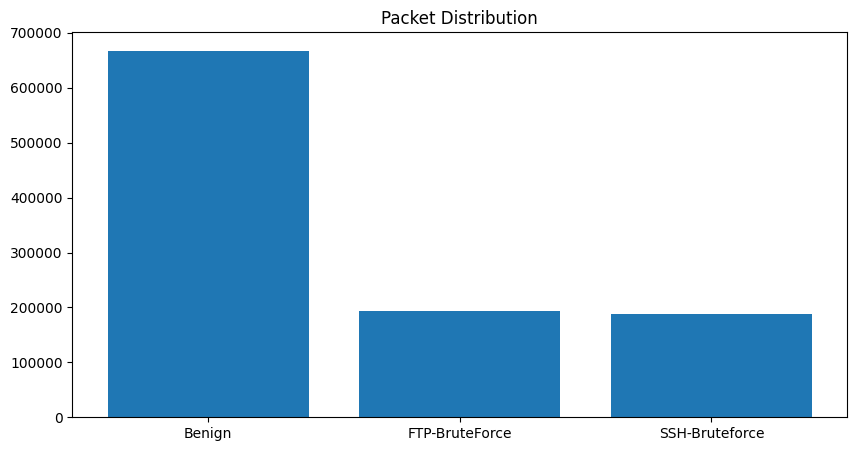

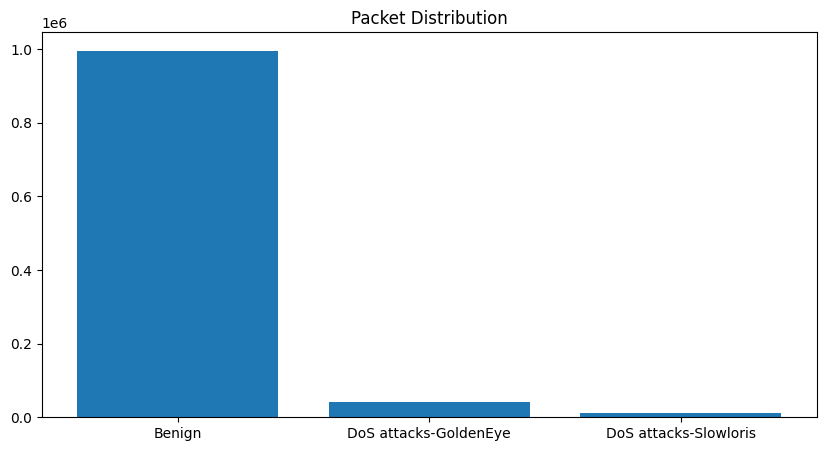

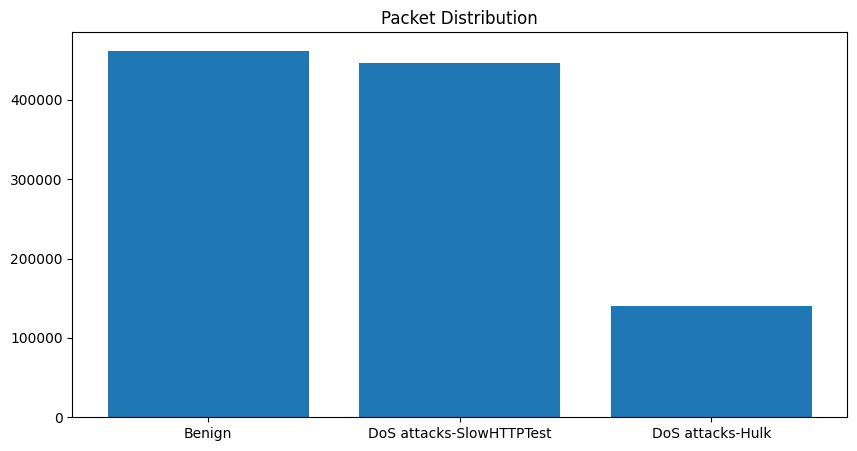

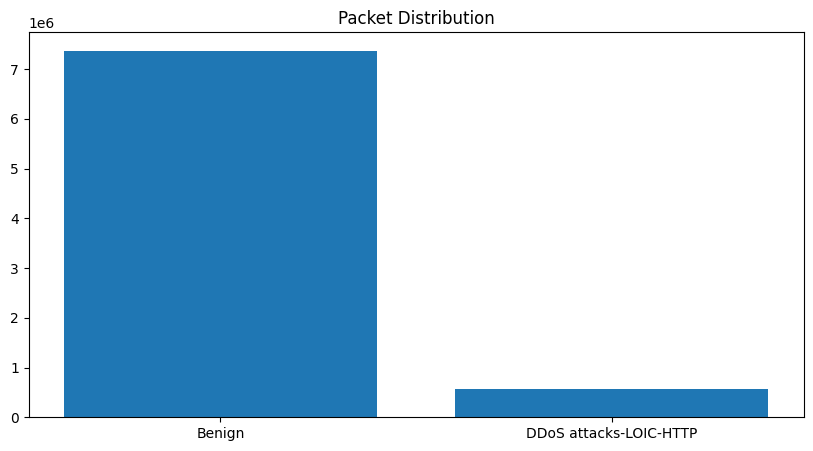

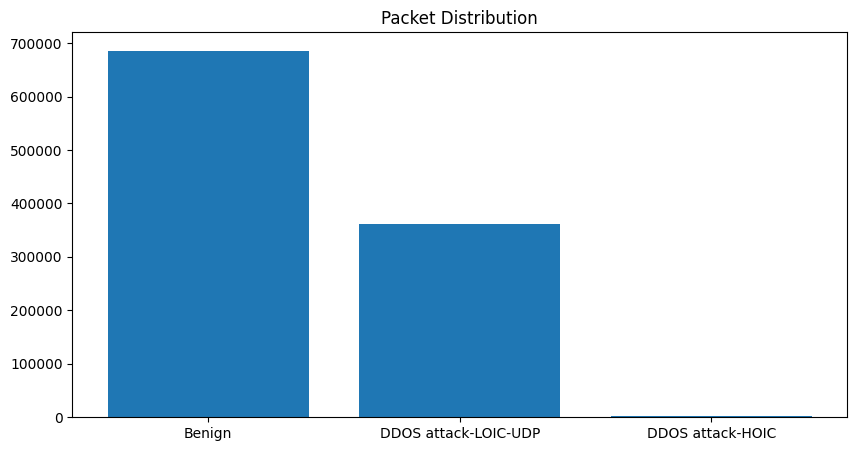

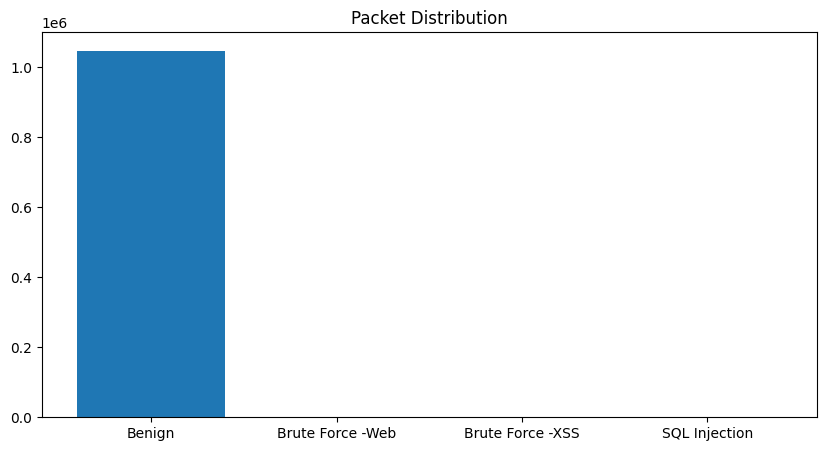

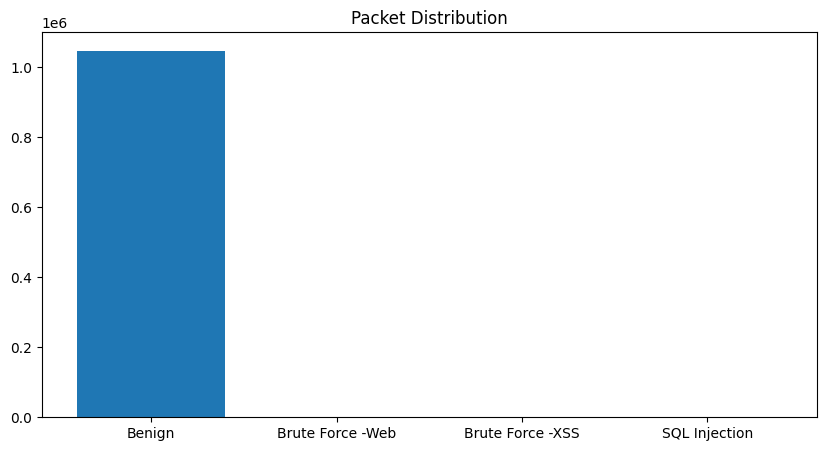

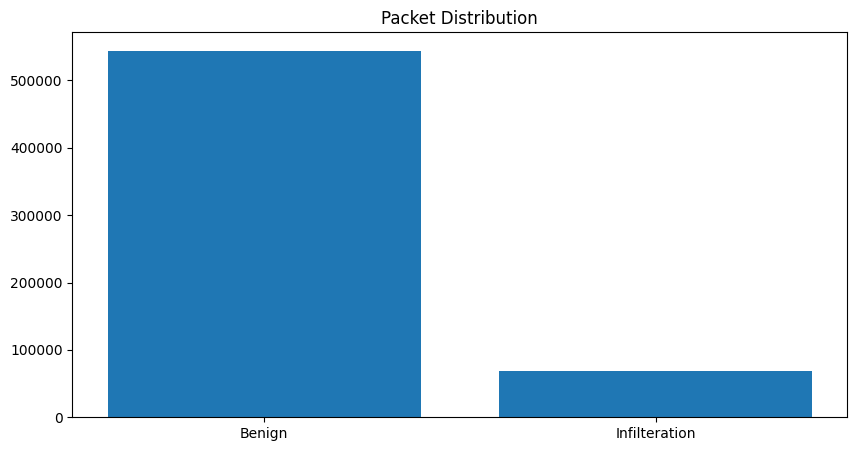

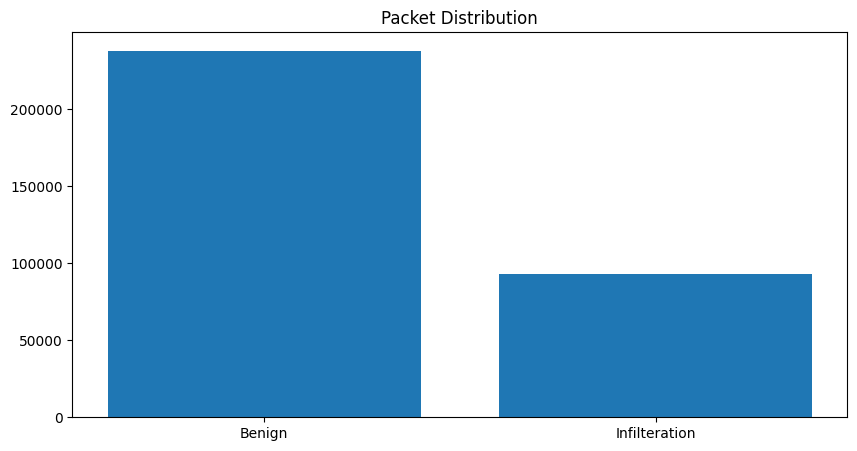

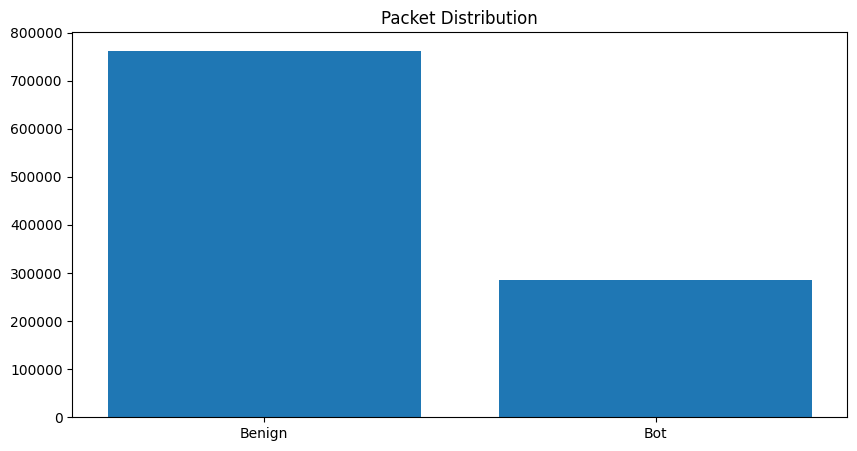

In [ ]:
visualizeBar(network_data_d1)
visualizeBar(network_data_d2)
visualizeBar(network_data_d3)
visualizeBar(network_data_d4)
visualizeBar(network_data_d5)
visualizeBar(network_data_d6)
visualizeBar(network_data_d7)
visualizeBar(network_data_d8)
visualizeBar(network_data_d9)
visualizeBar(network_data_d10)

In [ ]:
network_data_d1 = dropInfinateNull(network_data_d1)
network_data_d2 = dropInfinateNull(network_data_d2)
network_data_d3 = dropInfinateNull(network_data_d3)
network_data_d4 = dropInfinateNull(network_data_d4)
network_data_d5 = dropInfinateNull(network_data_d5)
network_data_d6 = dropInfinateNull(network_data_d6)
network_data_d7 = dropInfinateNull(network_data_d7)
network_data_d8 = dropInfinateNull(network_data_d8)
network_data_d9 = dropInfinateNull(network_data_d9)
network_data_d10 = dropInfinateNull(network_data_d10)

In [ ]:
network_data_d1 = dropUnnecessaryColumn(network_data_d1)
network_data_d2 = dropUnnecessaryColumn(network_data_d2)
network_data_d3 = dropUnnecessaryColumn(network_data_d3)
network_data_d4 = dropUnnecessaryColumn(network_data_d4)
network_data_d5 = dropUnnecessaryColumn(network_data_d5)
network_data_d6 = dropUnnecessaryColumn(network_data_d6)
network_data_d7 = dropUnnecessaryColumn(network_data_d7)
network_data_d8 = dropUnnecessaryColumn(network_data_d8)
network_data_d9 = dropUnnecessaryColumn(network_data_d9)
network_data_d10 = dropUnnecessaryColumn(network_data_d10)

In [ ]:
network_data = pd.concat([network_data_d1, network_data_d2], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d1, network_data_d2

network_data = pd.concat([network_data, network_data_d3], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d3

network_data = pd.concat([network_data, network_data_d4], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d4

network_data = pd.concat([network_data, network_data_d5], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d5

network_data = pd.concat([network_data, network_data_d6], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d6

network_data = pd.concat([network_data, network_data_d7], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d7

network_data = pd.concat([network_data, network_data_d8], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d8

network_data = pd.concat([network_data, network_data_d9], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d9

network_data = pd.concat([network_data, network_data_d10], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d10

In [ ]:
print(network_data['Label'].value_counts())

Label
Benign                      13390249
DDOS attack-HOIC              686012
DDoS attacks-LOIC-HTTP        576191
DoS attacks-Hulk              461912
Bot                           286191
FTP-BruteForce                193354
SSH-Bruteforce                187589
Infilteration                 160639
DoS attacks-SlowHTTPTest      139890
DoS attacks-GoldenEye          41508
DoS attacks-Slowloris          10990
DDOS attack-LOIC-UDP            1730
Brute Force -Web                 611
Brute Force -XSS                 230
SQL Injection                     87
Name: count, dtype: int64


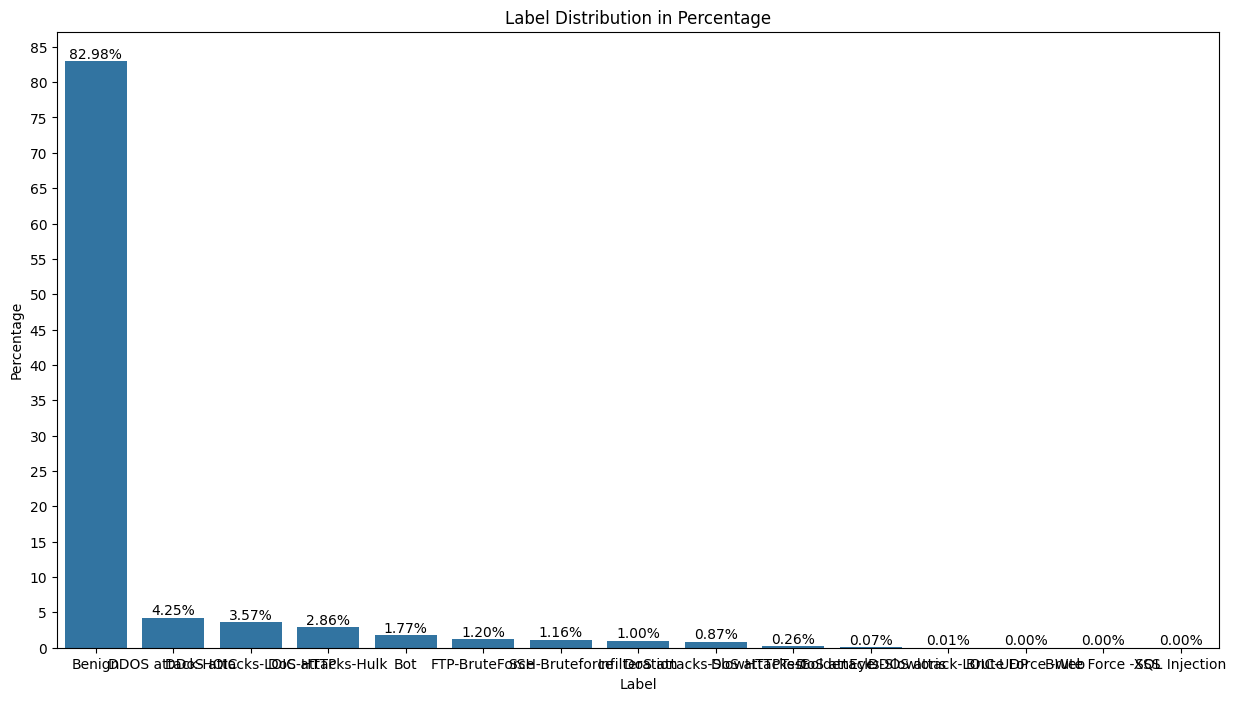

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
plt.yticks(np.arange(0, 100, 5))

# Calculate percentages manually
label_counts = network_data["Label"].value_counts(normalize=True) * 100  # Convert to percentage
ax = sns.barplot(x=label_counts.index, y=label_counts.values)  # Use barplot instead of countplot

# Add percentage labels on bars
ax.bar_label(ax.containers[0], fmt="%.2f%%", label_type="edge")

plt.xlabel("Label")
plt.ylabel("Percentage")
plt.title("Label Distribution in Percentage")
plt.show()

In [ ]:
# Sample 40,000 records for each label
sampled_data = network_data.groupby('Label').apply(lambda x: x.sample(n=min(10500, len(x)), random_state=1))

# Reset the index of the sampled data
sampled_data = sampled_data.reset_index(drop=True)
print(f"Total records in the sampled dataset: {len(sampled_data)}")

network_data = sampled_data

C:\Users\Pratham\AppData\Local\Temp\ipykernel_17284\3762728240.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = network_data.groupby('Label').apply(lambda x: x.sample(n=min(10500, len(x)), random_state=1))


Total records in the sampled dataset: 118158


In [ ]:
print(network_data['Label'].value_counts())

Label
Benign                      10500
Bot                         10500
DDOS attack-HOIC            10500
DDoS attacks-LOIC-HTTP      10500
DoS attacks-SlowHTTPTest    10500
DoS attacks-Hulk            10500
DoS attacks-GoldenEye       10500
FTP-BruteForce              10500
Infilteration               10500
SSH-Bruteforce              10500
DoS attacks-Slowloris       10500
DDOS attack-LOIC-UDP         1730
Brute Force -Web              611
Brute Force -XSS              230
SQL Injection                  87
Name: count, dtype: int64


In [ ]:
labels_to_drop = [
    "DDOS attack-LOIC-UDP",
    "Brute Force -Web",
    "Brute Force -XSS",
    "SQL Injection"
]

# Drop records where "Label" is in labels_to_drop
network_data = network_data[~network_data['Label'].isin(labels_to_drop)]

In [ ]:
print(network_data['Label'].value_counts())

Label
Benign                      10500
Bot                         10500
DDOS attack-HOIC            10500
DDoS attacks-LOIC-HTTP      10500
DoS attacks-GoldenEye       10500
DoS attacks-Hulk            10500
DoS attacks-SlowHTTPTest    10500
DoS attacks-Slowloris       10500
FTP-BruteForce              10500
Infilteration               10500
SSH-Bruteforce              10500
Name: count, dtype: int64


In [ ]:
# drop the constant columns (which varience is 0)

variances = network_data.var(numeric_only=True)
constant_columns = variances[variances == 0].index
network_data = network_data.drop(constant_columns, axis=1)

print(constant_columns)
print (network_data.shape)

Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg'],
      dtype='object')
(115500, 75)


In [ ]:
duplicates = set()
for i in range(0, len(network_data.columns)):
    col1 = network_data.columns[i]
    for j in range(i+1, len(network_data.columns)):
        col2 = network_data.columns[j]
        if(network_data[col1].equals(network_data[col2])):
            duplicates.add(col2)

print (duplicates)
network_data.drop(duplicates, axis=1, inplace=True)
print (network_data.shape)

{'Subflow Bwd Byts', 'Subflow Bwd Pkts', 'Subflow Fwd Pkts', 'CWE Flag Count', 'ECE Flag Cnt', 'Subflow Fwd Byts', 'SYN Flag Cnt'}
(115500, 68)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

network_data['Label'] = label_encoder.fit_transform(network_data['Label'])
attack_types = label_encoder.classes_
attack_encodings = label_encoder.transform(attack_types)

attack_mapping = dict(zip(attack_types, attack_encodings))

for attack, encoding in attack_mapping.items():
    print(f"{attack}: {encoding}")

Benign: 0
Bot: 1
DDOS attack-HOIC: 2
DDoS attacks-LOIC-HTTP: 3
DoS attacks-GoldenEye: 4
DoS attacks-Hulk: 5
DoS attacks-SlowHTTPTest: 6
DoS attacks-Slowloris: 7
FTP-BruteForce: 8
Infilteration: 9
SSH-Bruteforce: 10


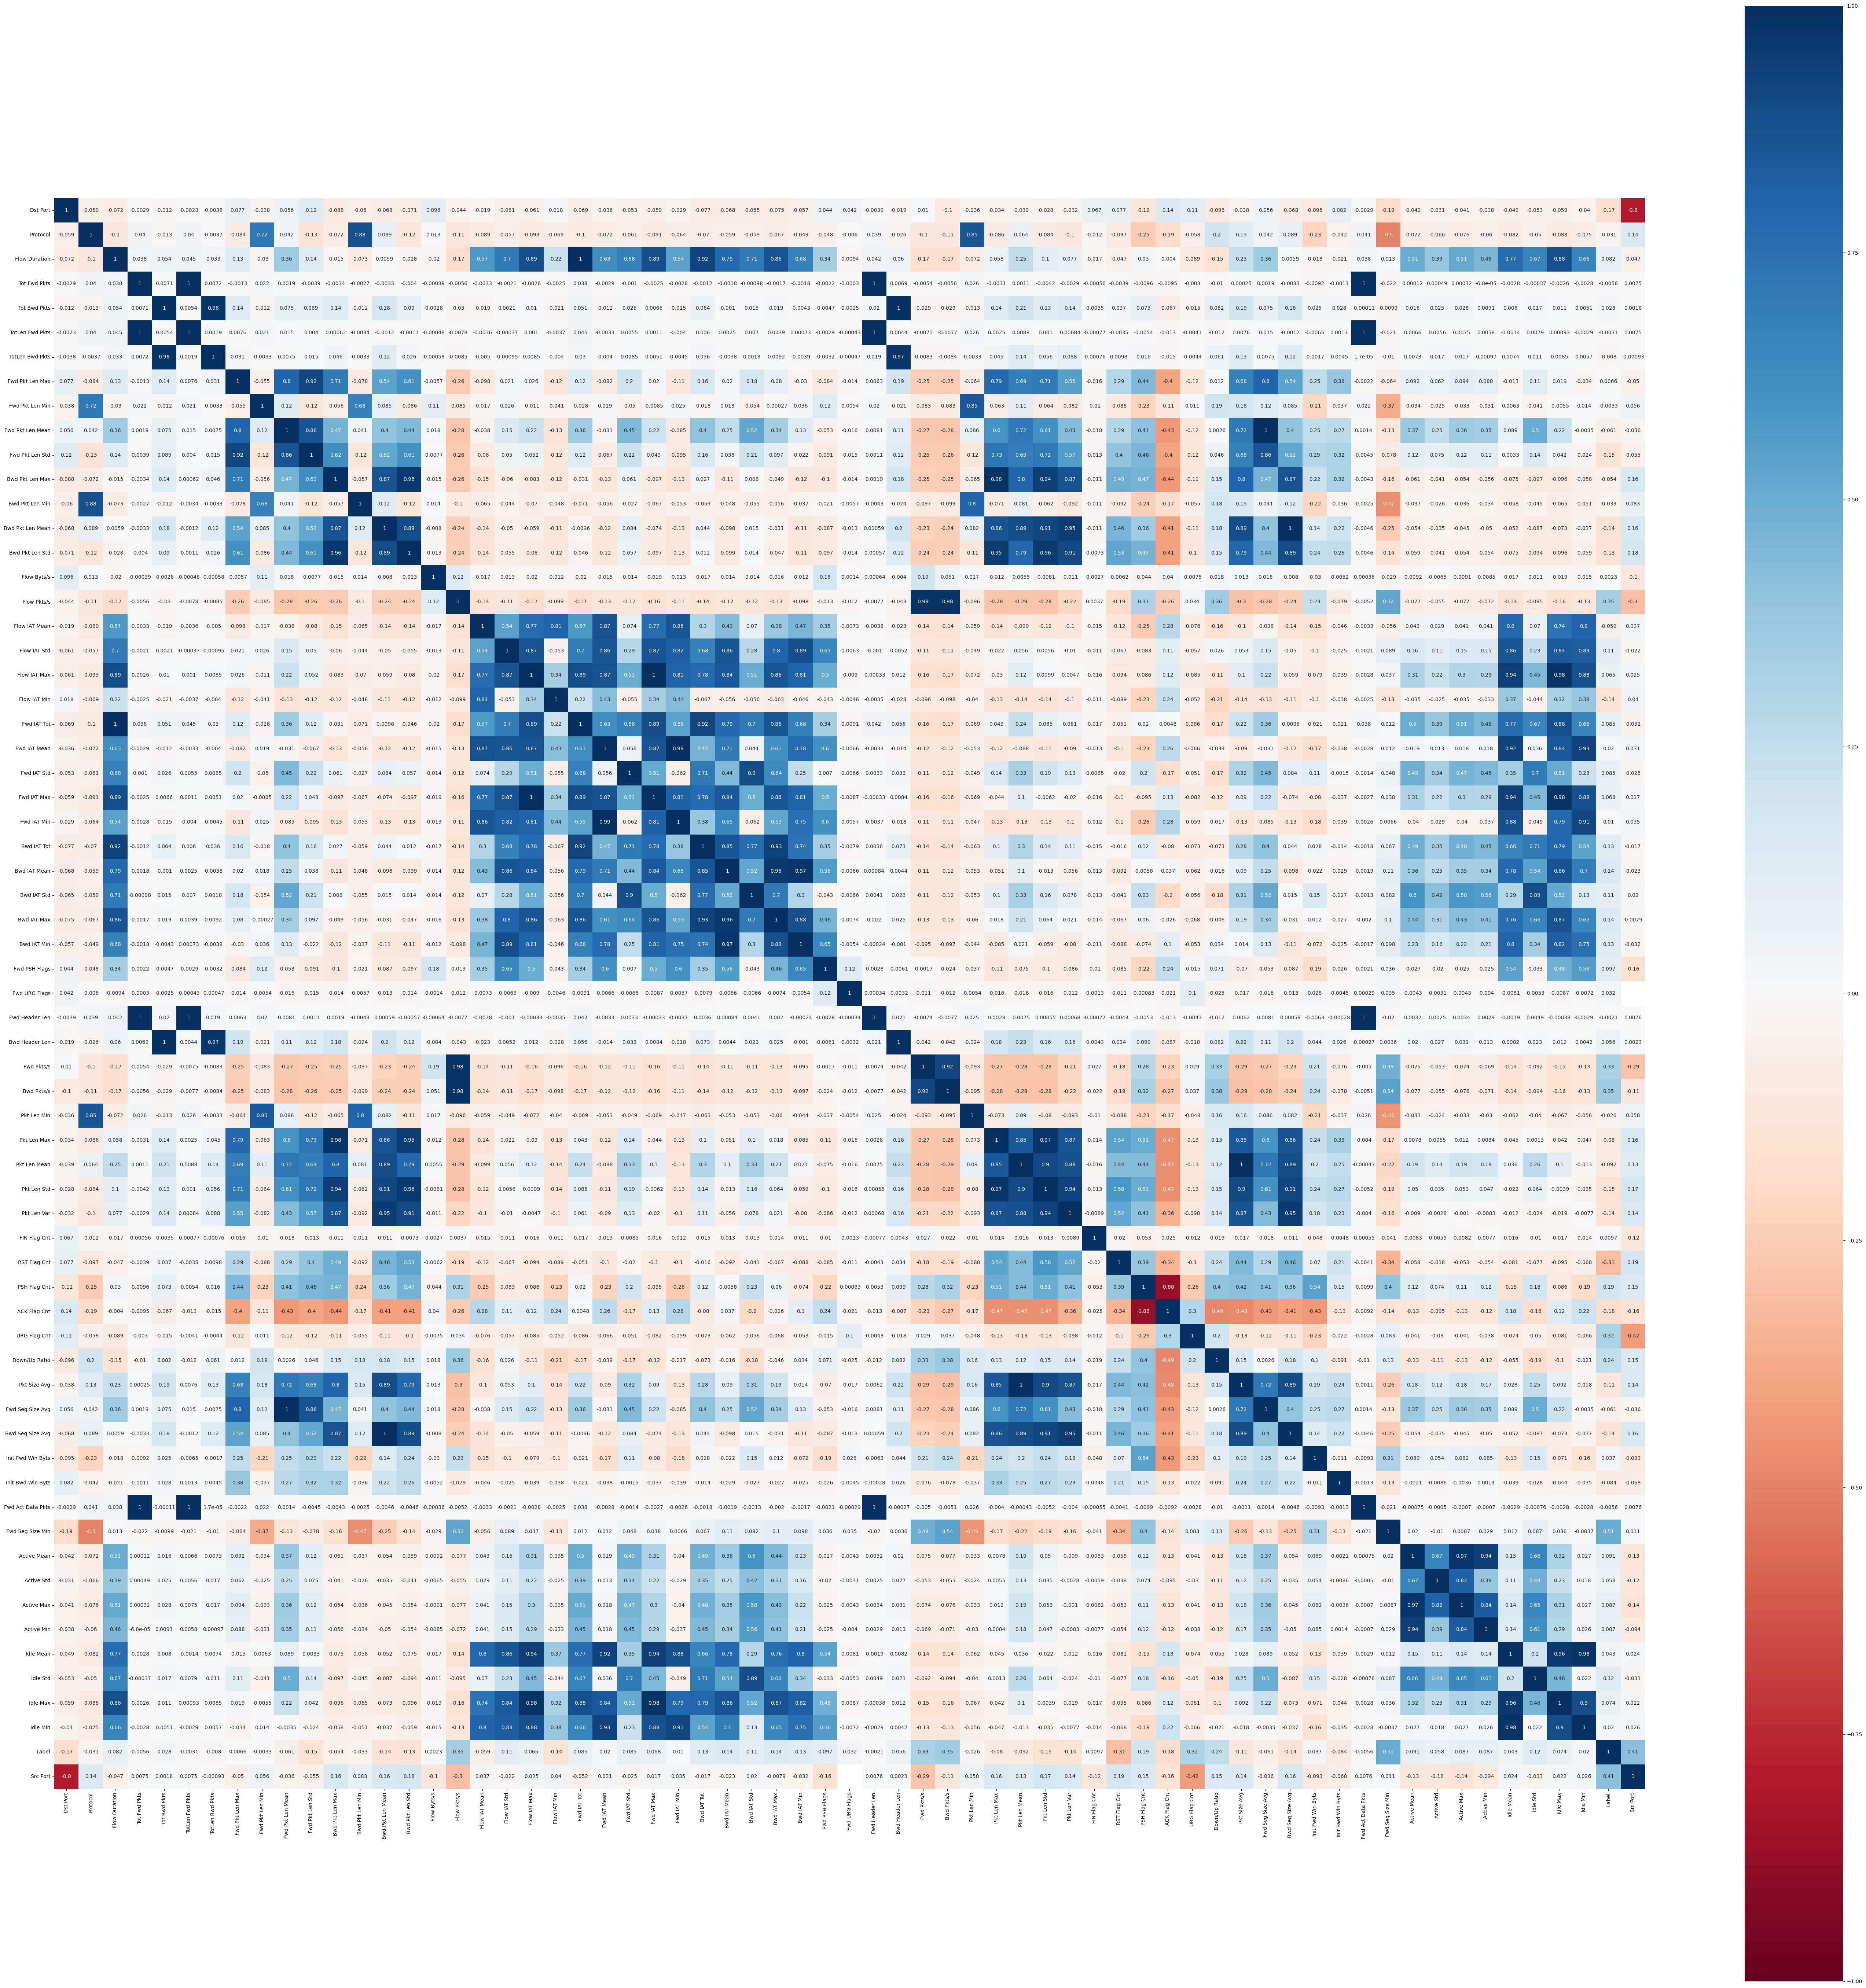

In [ ]:
plt.figure(figsize=(70, 70))
corr = network_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [ ]:
correlated_col = set()
is_correlated = [True] * len(corr.columns)
threshold = 0.90
for i in range (len(corr.columns)):
    if(is_correlated[i]):
        for j in range(i):
          if (corr.iloc[i, j] >= threshold) and (is_correlated[j]):
            colname = corr.columns[j]
            is_correlated[j]=False
            correlated_col.add(colname)

print(correlated_col)
print(len(correlated_col))

{'Tot Bwd Pkts', 'Fwd IAT Min', 'Bwd Pkt Len Mean', 'Fwd IAT Max', 'Active Mean', 'Bwd IAT Mean', 'Fwd Pkt Len Mean', 'Idle Mean', 'Bwd Pkt Len Std', 'Fwd Header Len', 'Pkt Len Var', 'Pkt Len Max', 'Fwd IAT Tot', 'Bwd IAT Tot', 'Pkt Len Std', 'Flow Pkts/s', 'Bwd Pkt Len Max', 'Tot Fwd Pkts', 'Fwd IAT Mean', 'TotLen Fwd Pkts', 'Flow IAT Max', 'Flow Duration', 'Fwd Pkts/s', 'Fwd Pkt Len Max', 'TotLen Bwd Pkts', 'Pkt Len Mean'}
26


In [ ]:
network_data

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Flow ID,Src IP,Src Port,Dst IP
0,443,6,111716897,7,2,169,92,46,0,24.142857,...,163682,55673178.5,4.067040e+06,58549010,52797347,0,NaN,NaN,NaN,NaN
1,80,6,5446326,4,4,97,231,97,0,24.250000,...,0,0.0,0.000000e+00,0,0,0,169.254.169.254-172.31.64.71-80-50880-6,172.31.64.71,50880.0,169.254.169.254
2,80,6,92,2,0,0,0,0,0,0.000000,...,0,0.0,0.000000e+00,0,0,0,NaN,NaN,NaN,NaN
3,2111,6,86174361,2,0,0,0,0,0,0.000000,...,0,86174361.0,0.000000e+00,86174361,86174361,0,NaN,NaN,NaN,NaN
4,443,6,60341238,4,2,148,252,74,0,37.000000,...,77775,59935597.0,0.000000e+00,59935597,59935597,0,172.31.64.100-13.89.187.212-49690-443-6,172.31.64.100,49690.0,13.89.187.212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118153,22,6,7,1,1,0,0,0,0,0.000000,...,0,0.0,0.000000e+00,0,0,10,NaN,NaN,NaN,NaN
118154,22,6,6,1,1,0,0,0,0,0.000000,...,0,0.0,0.000000e+00,0,0,10,NaN,NaN,NaN,NaN
118155,22,6,396368,24,22,1928,2665,640,0,80.333333,...,0,0.0,0.000000e+00,0,0,10,NaN,NaN,NaN,NaN
118156,22,6,7,1,1,0,0,0,0,0.000000,...,0,0.0,0.000000e+00,0,0,10,NaN,NaN,NaN,NaN


In [ ]:
# network_data.to_csv('Dataset/PreprocessComplete.csv', index=False)

In [3]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('Dataset/PreprocessComplete.csv')
print(data.shape)

print(data.head().to_string())

data = data.drop(columns=['Flow ID','Src IP','Src Port','Dst IP','Dst Port'],inplace=False)

X = data.drop(columns='Label',inplace=False)
y = data['Label']

print(X.shape)
print(X.head().to_string())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=34)

C:\Users\Pratham\AppData\Local\Temp\ipykernel_23520\3575511912.py:3: DtypeWarning: Columns (64,65,67) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Dataset/PreprocessComplete.csv')


(115500, 68)
   Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  Fwd Pkt Len Std  Bwd Pkt Len Max  Bwd Pkt Len Min  Bwd Pkt Len Mean  Bwd Pkt Len Std  Flow Byts/s   Flow Pkts/s  Flow IAT Mean  Flow IAT Std  Flow IAT Max  Flow IAT Min  Fwd IAT Tot  Fwd IAT Mean   Fwd IAT Std  Fwd IAT Max  Fwd IAT Min  Bwd IAT Tot  Bwd IAT Mean   Bwd IAT Std  Bwd IAT Max  Bwd IAT Min  Fwd PSH Flags  Fwd URG Flags  Fwd Header Len  Bwd Header Len    Fwd Pkts/s  Bwd Pkts/s  Pkt Len Min  Pkt Len Max  Pkt Len Mean  Pkt Len Std  Pkt Len Var  FIN Flag Cnt  RST Flag Cnt  PSH Flag Cnt  ACK Flag Cnt  URG Flag Cnt  Down/Up Ratio  Pkt Size Avg  Fwd Seg Size Avg  Bwd Seg Size Avg  Init Fwd Win Byts  Init Bwd Win Byts  Fwd Act Data Pkts  Fwd Seg Size Min  Active Mean    Active Std  Active Max  Active Min   Idle Mean      Idle Std  Idle Max  Idle Min  Label                                  Flow ID         Src IP  Src Por

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.value_counts())

(92400, 62)
(92400,)
(23100, 62)
Label
7     2174
9     2162
6     2146
0     2118
3     2110
5     2097
2     2095
8     2095
1     2048
10    2036
4     2019
Name: count, dtype: int64


In [4]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
# Check for NaN values
print("Missing values per column:")
print(X_train.isna().sum())

# Check for infinite values
print("\nColumns containing infinite values:")
print(X_train.replace([np.inf, -np.inf], np.nan).isna().sum())

# Check for extremely large values
print("\nMax values per column:")
print(X_train.max())

Missing values per column:
Protocol           0
Flow Duration      0
Tot Fwd Pkts       0
Tot Bwd Pkts       0
TotLen Fwd Pkts    0
                  ..
Active Min         0
Idle Mean          0
Idle Std           0
Idle Max           0
Idle Min           0
Length: 62, dtype: int64

Columns containing infinite values:
Protocol           0
Flow Duration      0
Tot Fwd Pkts       0
Tot Bwd Pkts       0
TotLen Fwd Pkts    0
                  ..
Active Min         0
Idle Mean          0
Idle Std           0
Idle Max           0
Idle Min           0
Length: 62, dtype: int64

Max values per column:
Protocol                  17.0
Flow Duration      119999502.0
Tot Fwd Pkts          167323.0
Tot Bwd Pkts            6869.0
TotLen Fwd Pkts      5354336.0
                      ...     
Active Min         106000000.0
Idle Mean          119464308.0
Idle Std            38900000.0
Idle Max           119464308.0
Idle Min           119464308.0
Length: 62, dtype: float64


In [6]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

In [7]:
results = {"Model": [], "Accuracy": [], "F1-Score": [], "Precision": [], "Recall": [], "ROC AUC": []}
conf_matrices = {}

In [8]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred , average='weighted')
    precision = precision_score(y_test, y_pred , average='weighted')
    recall = recall_score(y_test, y_pred,average='weighted')
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr") if y_prob is not None else np.nan



    # Store results
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["F1-Score"].append(f1)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["ROC AUC"].append(roc_auc)

    # Store confusion matrix
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

c:\Users\Pratham\Desktop\College\Final Year\PD\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Pratham\Desktop\College\Final Year\PD\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Pratham\Desktop\College\Final Year\PD\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: Unde

In [9]:
results_df = pd.DataFrame(results)

C:\Users\Pratham\AppData\Local\Temp\ipykernel_23520\1022843118.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df.sort_values(by="Accuracy", ascending=False), palette="coolwarm")


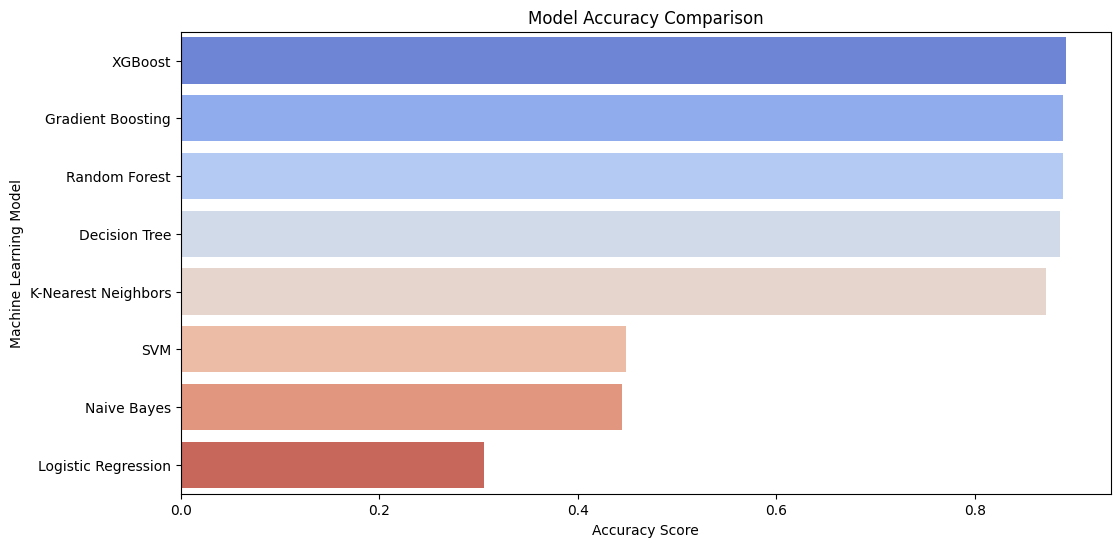

C:\Users\Pratham\AppData\Local\Temp\ipykernel_23520\1022843118.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="F1-Score", y="Model", data=results_df.sort_values(by="F1-Score", ascending=False), palette="viridis")


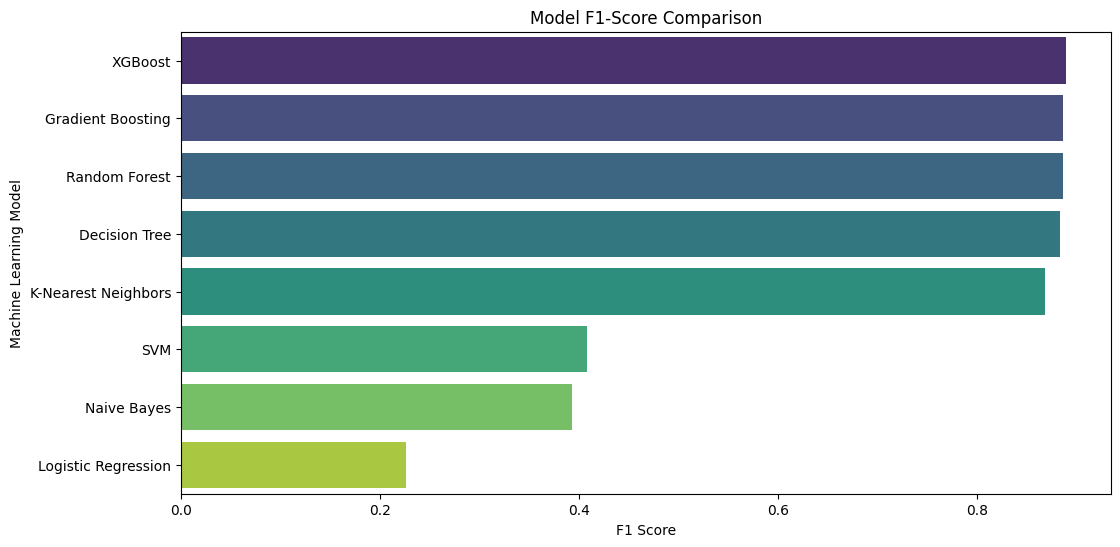

C:\Users\Pratham\AppData\Local\Temp\ipykernel_23520\1022843118.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ROC AUC", y="Model", data=results_df.sort_values(by="ROC AUC", ascending=False), palette="plasma")


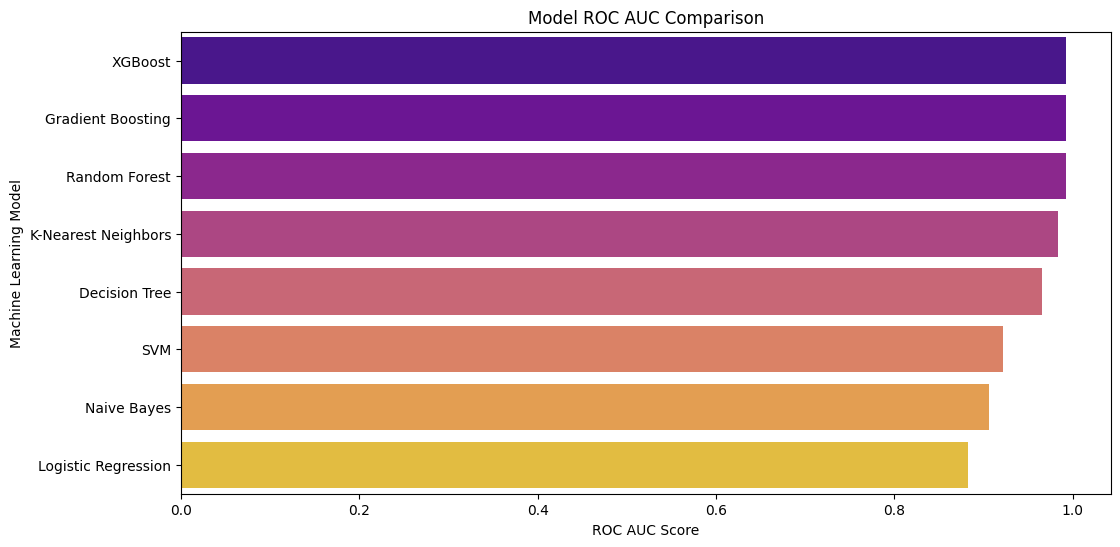

c:\Users\Pratham\Desktop\College\Final Year\PD\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Pratham\Desktop\College\Final Year\PD\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Pratham\Desktop\College\Final Year\PD\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Confusion Matrix for Logistic Regression:
 [[1237    0    0  157   76    0    8  190  262  188    0]
 [ 981    0    0    0   13    0    0    3 1051    0    0]
 [ 502    0    0    0 1304    0  288    0    1    0    0]
 [ 139    0    0  944 1025    0    0    0    0    0    2]
 [ 494    0    0  324 1083    0    0  110    0    8    0]
 [1581    0    0    5   14    2    0  148  346    1    0]
 [   0    0    0    0    0    0    0    0 2146    0    0]
 [ 514    0    0    0   18    0    0 1444   29  169    0]
 [   0    0    0    0    0    0    0    0 2095    0    0]
 [1014    0    0  111   67    0   10  139  565  256    0]
 [ 987    0    0    0    0    0    0    0 1049    0    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.58      0.26      2118
           1       0.00      0.00      0.00      2048
           2       0.00      0.00      0.00      2095
           3       0.61      0.45      0.52      2110
           4       0.3

c:\Users\Pratham\Desktop\College\Final Year\PD\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Pratham\Desktop\College\Final Year\PD\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Pratham\Desktop\College\Final Year\PD\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m


Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.26      0.36      2118
           1       0.00      0.00      0.00      2048
           2       0.00      0.00      0.00      2095
           3       0.85      0.91      0.88      2110
           4       0.86      0.73      0.79      2019
           5       0.71      0.00      0.00      2097
           6       0.55      0.83      0.66      2146
           7       0.92      0.90      0.91      2174
           8       0.92      0.31      0.47      2095
           9       0.59      0.07      0.12      2162
          10       0.16      0.92      0.28      2036

    accuracy                           0.45     23100
   macro avg       0.56      0.45      0.41     23100
weighted avg       0.56      0.45      0.41     23100

------------------------------------------------------------
Confusion Matrix for XGBoost:
 [[1469    1    1    0    0    0    0    5    0  642    0]
 [   0 2045 

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df.sort_values(by="Accuracy", ascending=False), palette="coolwarm")
plt.xlabel("Accuracy Score")
plt.ylabel("Machine Learning Model")
plt.title("Model Accuracy Comparison")
plt.show()

# Plot F1-score comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="F1-Score", y="Model", data=results_df.sort_values(by="F1-Score", ascending=False), palette="viridis")
plt.xlabel("F1 Score")
plt.ylabel("Machine Learning Model")
plt.title("Model F1-Score Comparison")
plt.show()

# Plot ROC AUC comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="ROC AUC", y="Model", data=results_df.sort_values(by="ROC AUC", ascending=False), palette="plasma")
plt.xlabel("ROC AUC Score")
plt.ylabel("Machine Learning Model")
plt.title("Model ROC AUC Comparison")
plt.show()

# Print classification reports
for name, matrix in conf_matrices.items():
    print(f"Confusion Matrix for {name}:\n", matrix)
    print("\nClassification Report:\n", classification_report(y_test, models[name].predict(X_test)))
    print("-" * 60)

# Show the final performance metrics table
print("\nFinal Performance Metrics:\n")
print(results_df)

In [14]:
import joblib
import os

# Create a directory to store models if it doesn't exist
model_dir = "saved_models"
os.makedirs(model_dir, exist_ok=True)

# Save each trained model
for name, model in models.items():
    model_path = os.path.join(model_dir, f"{name.replace(' ', '_')}.joblib")
    joblib.dump(model, model_path)
    print(f"Model saved: {model_path}")


Model saved: saved_models\Logistic_Regression.joblib
Model saved: saved_models\Decision_Tree.joblib
Model saved: saved_models\Random_Forest.joblib
Model saved: saved_models\Gradient_Boosting.joblib
Model saved: saved_models\SVM.joblib
Model saved: saved_models\XGBoost.joblib
Model saved: saved_models\K-Nearest_Neighbors.joblib
Model saved: saved_models\Naive_Bayes.joblib
